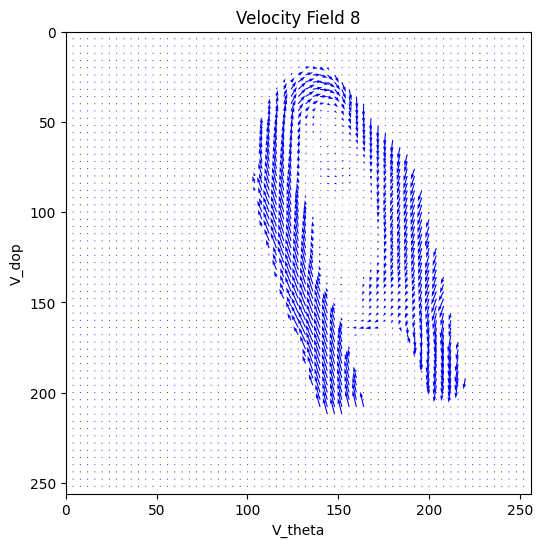

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# # データの準備（test_inputs, test_outputs は (2000, 1, 256, 256)）
test_inputs = np.load('test_inputs.npy')
test_outputs = np.load('test_outputs.npy')
# test_gt = np.load('test_gt.npy')

# 出力フォルダの作成
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)
# 画像サイズ
H, W = 256, 256
i = 7

# 格子点を作成
x = np.arange(0, W, 4)  # 8ピクセル間隔でプロット
y = np.arange(0, H, 4)
# x = np.arange(0, W, 8)  # 8ピクセル間隔でプロット
# y = np.arange(0, H, 8)
X, Y = np.meshgrid(x, y)

# ベクトル場の描画
vx = test_inputs[i, 0]
vy = -test_outputs[i, 0]

# 8ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]
V_theta = vy[::4, ::4]

# 描画
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, V_theta, V_dop, angles="xy", scale_units="xy", scale=0.1, color="b")
plt.xlim(0, W)
plt.ylim(H, 0)
plt.title(f"Velocity Field {i+1}")
plt.xlabel("V_theta")
plt.ylabel("V_dop")
plt.show()

# 保存
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}.png"))
plt.close()

# print(f"{i}枚のベクトル場画像を '{output_folder}' に保")


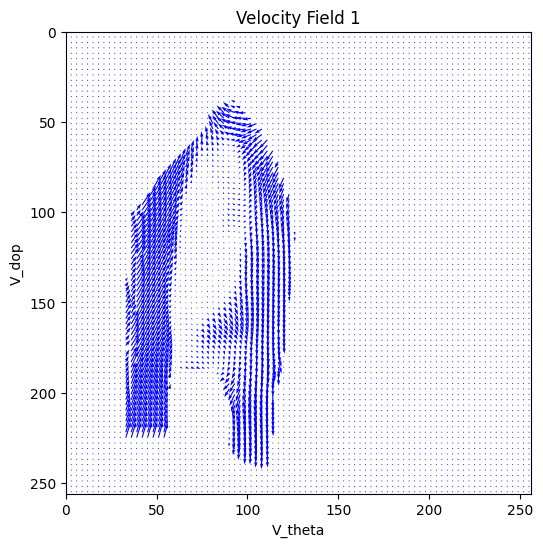

In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# # データの準備（test_inputs, test_outputs は (2000, 1, 256, 256)）
test_inputs = np.load('test_inputs.npy')
# test_outputs = np.load('test_outputs.npy')
test_gt = np.load('test_gt.npy')

# 出力フォルダの作成
gt_folder = "vector_field_gt"
os.makedirs(gt_folder, exist_ok=True)
# 画像サイズ
H, W = 256, 256
i = 0

# 格子点を作成
x = np.arange(0, W, 3)  # 8ピクセル間隔でプロット
y = np.arange(0, H, 3)
# x = np.arange(0, W, 8)  # 8ピクセル間隔でプロット
# y = np.arange(0, H, 8)
X, Y = np.meshgrid(x, y)

# ベクトル場の描画
vx = test_inputs[i, 0]
vy = test_gt[i, 0]

# 8ピクセルごとにダウンサンプリング
V_dop = vx[::3, ::3]
V_theta = vy[::3, ::3]

# 描画
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, V_theta, V_dop, angles="xy", scale_units="xy", scale=0.1, color="b")
plt.xlim(0, W)
plt.ylim(H, 0)
plt.title(f"Velocity Field {i+1}")
plt.xlabel("V_theta")
plt.ylabel("V_dop")
plt.show()

# 保存
plt.savefig(os.path.join(gt_folder, f"vector_field_{i+1}.png"))
plt.close()

# print(f"{i}枚のベクトル場画像を '{output_folder}' に保存しました！")


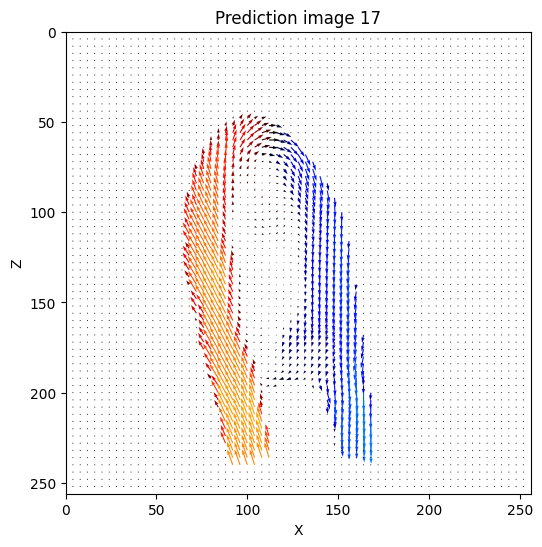

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# データの準備
test_inputs = np.load('test_inputs.npy')   # 極座標系の vr
test_outputs = np.load('test_outputs.npy') # 極座標系の vtheta

# 出力フォルダ
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)

# 画像サイズ
H, W = 256, 256
i = 17  # 可視化するサンプルのインデックス

# 格子点を作成（4ピクセル間隔）
x = np.arange(0, W, 4)
y = np.arange(0, H, 4)
X, Y = np.meshgrid(x, y)

# ベクトル場のデータ
vx = test_inputs[i, 0]  # Radial velocity (vr)
vy = -test_outputs[i, 0]  # Tangential velocity (vtheta)

# 4ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]  # Radial component
V_theta = vy[::4, ::4]  # Tangential component

# **V_dop の最大絶対値を取得（カラーマップを対称にする）**
max_V = np.abs(V_dop).max()

# **カスタムカラーマップの作成**
cmap_colors = [
    (1, 1, 0),  # Yellow (負の大きい速度)
    (1, 0, 0),  # Red (負の中間)
    (0, 0, 0),  # Black (ゼロ)
    (0, 0, 1),  # Blue (正の中間)
    (0, 0.5, 1)  # Light Blue (正の大きい速度)
]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

# **カラーマップの範囲を [-max_V, max_V] に設定**
norm = mcolors.Normalize(vmin=-max_V, vmax=max_V)

# **描画**
plt.figure(figsize=(6, 6))
plt.xlim(0, W)
plt.ylim(H, 0)

# **ベクトルの大きさと符号に応じた色を適用**
plt.quiver(X, Y, V_theta, V_dop, V_dop, angles="xy", scale_units="xy", scale=0.1, cmap=cmap_custom, norm=norm)

# # **カラーバーを追加**
# cbar = plt.colorbar()
# cbar.set_label("V_dop (Radial Velocity)")

# **タイトル**
plt.title(f"Prediction image {i}")
plt.xlabel("X")
plt.ylabel("Z")

# **表示**
plt.show()

# **画像保存**
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}_colored_vdop.png"))
plt.close()


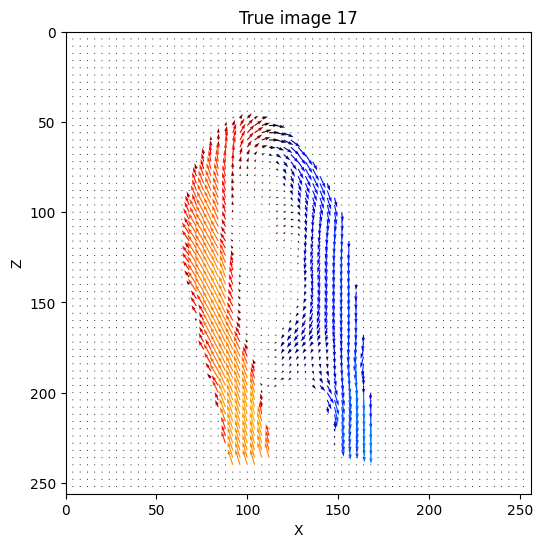

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# データの準備
test_inputs = np.load('test_inputs.npy')   # 極座標系の vr
# test_outputs = np.load('test_outputs.npy') # 極座標系の vtheta
test_gt = np.load('test_gt.npy')

# 出力フォルダ
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)

# 画像サイズ
H, W = 256, 256
i = 17  # 可視化するサンプルのインデックス

# 格子点を作成（4ピクセル間隔）
x = np.arange(0, W, 4)
y = np.arange(0, H, 4)
X, Y = np.meshgrid(x, y)

# ベクトル場のデータ
vx = test_inputs[i, 0]  # Radial velocity (vr)
vy = -test_outputs[i, 0]  # Tangential velocity (vtheta)
vy = -test_gt[i, 0]

# 4ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]  # Radial component
V_theta = vy[::4, ::4]  # Tangential component

# **V_dop の最大絶対値を取得（カラーマップを対称にする）**
max_V = np.abs(V_dop).max()

# **カスタムカラーマップの作成**
cmap_colors = [
    (1, 1, 0),  # Yellow (負の大きい速度)
    (1, 0, 0),  # Red (負の中間)
    (0, 0, 0),  # Black (ゼロ)
    (0, 0, 1),  # Blue (正の中間)
    (0, 0.5, 1)  # Light Blue (正の大きい速度)
]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

# **カラーマップの範囲を [-max_V, max_V] に設定**
norm = mcolors.Normalize(vmin=-max_V, vmax=max_V)

# **描画**
plt.figure(figsize=(6, 6))
plt.xlim(0, W)
plt.ylim(H, 0)

# **ベクトルの大きさと符号に応じた色を適用**
plt.quiver(X, Y, V_theta, V_dop, V_dop, angles="xy", scale_units="xy", scale=0.1, cmap=cmap_custom, norm=norm)

# # **カラーバーを追加**
# cbar = plt.colorbar()
# cbar.set_label("V_dop")

# **タイトル**
plt.title(f"True image {i}")
plt.xlabel("X")
plt.ylabel("Z")

# **表示**
plt.show()

# **画像保存**
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}_colored_vdop.png"))
plt.close()


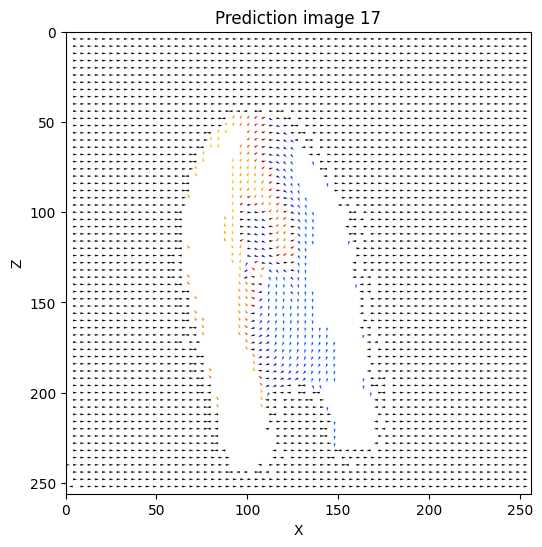

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# データの準備
test_inputs = np.load('test_inputs.npy')   # 極座標系の vr
test_outputs = np.load('test_outputs.npy') # 極座標系の vtheta

# 出力フォルダ
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)

# 画像サイズ
H, W = 256, 256
i = 17  # 可視化するサンプルのインデックス

# 格子点を作成（4ピクセル間隔）
x = np.arange(0, W, 4)
y = np.arange(0, H, 4)
X, Y = np.meshgrid(x, y)

# ベクトル場のデータ
vx = test_inputs[i, 0]  # Radial velocity (vr)
vy = -test_outputs[i, 0]  # Tangential velocity (vtheta)

# 4ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]  # Radial component
V_theta = vy[::4, ::4]  # Tangential component

# **速度の閾値を設定し、-0.5 ≦ V_dop ≦ 0.5 のベクトルのみ描画**
valid_mask = (V_dop >= -0.5) & (V_dop <= 0.5)

# **有効なデータのみ取得**
X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
U_valid = V_theta[valid_mask]
V_valid = V_dop[valid_mask]

# **ベクトルを正規化して大きさを統一**
magnitude = np.sqrt(U_valid**2 + V_valid**2)
U_valid /= magnitude
V_valid /= magnitude

# **V_dop の最大絶対値を取得（カラーマップを対称にする）**
max_V = np.abs(V_dop).max()

# **カスタムカラーマップの作成**
cmap_colors = [
    (1, 1, 0),  # Yellow (負の大きい速度)
    (1, 0, 0),  # Red (負の中間)
    (0, 0, 0),  # Black (ゼロ)
    (0, 0, 1),  # Blue (正の中間)
    (0, 0.5, 1)  # Light Blue (正の大きい速度)
]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

# **カラーマップの範囲を [-max_V, max_V] に設定**
norm = mcolors.Normalize(vmin=-max_V, vmax=max_V)

# **描画**
plt.figure(figsize=(6, 6))
plt.xlim(0, W)
plt.ylim(H, 0)

# **ベクトルの大きさを統一し、矢印の太さを調整**
plt.quiver(X_valid, Y_valid, U_valid, V_valid, V_valid, 
           angles="xy", scale_units="xy", scale=None, 
           cmap=cmap_custom, norm=norm, width=0.005, headlength=6, headaxislength=5)

# **タイトル**
plt.title(f"Prediction image {i}")
plt.xlabel("X")
plt.ylabel("Z")

# **表示**
plt.show()

# **画像保存**
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}_filtered_colored_vdop.png"))
plt.close()

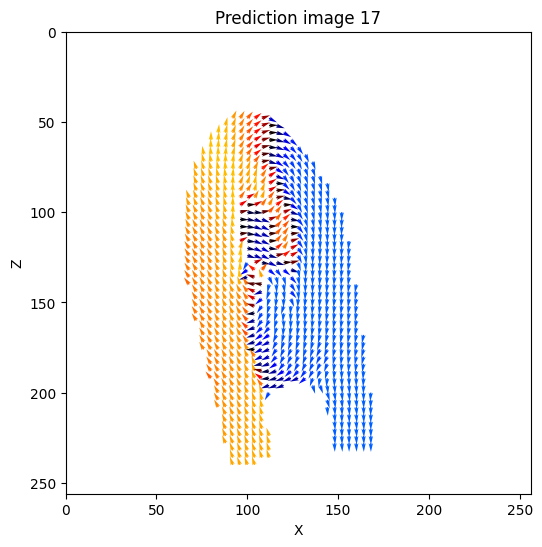

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# データの準備
test_inputs = np.load('test_inputs.npy')   # 極座標系の vr
test_outputs = np.load('test_outputs.npy') # 極座標系の vtheta

# 出力フォルダ
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)

# 画像サイズ
H, W = 256, 256
i = 17  # 可視化するサンプルのインデックス

# 格子点を作成（4ピクセル間隔）
x = np.arange(0, W, 4)
y = np.arange(0, H, 4)
X, Y = np.meshgrid(x, y)

# ベクトル場のデータ
vx = test_inputs[i, 0]  # Radial velocity (vr)
vy = -test_outputs[i, 0]  # Tangential velocity (vtheta)

# 4ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]  # Radial component
V_theta = vy[::4, ::4]  # Tangential component

# **速度の閾値を設定し、|V_dop| >= 0.5 のベクトルのみ描画**
valid_mask = np.abs(V_dop) >= 0.0001

# **有効なデータのみ取得**
X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
U_valid = V_theta[valid_mask]
V_valid = V_dop[valid_mask]

# **ベクトルを正規化して大きさを統一**
magnitude = np.sqrt(U_valid**2 + V_valid**2)
U_valid /= magnitude
V_valid /= magnitude

# **V_dop の最大絶対値を取得（カラーマップを対称にする）**
max_V = np.abs(V_dop).max()

# **カスタムカラーマップの作成**
cmap_colors = [
    (1, 1, 0),  # Yellow (負の大きい速度)
    (1, 0, 0),  # Red (負の中間)
    (0, 0, 0),  # Black (ゼロ)
    (0, 0, 1),  # Blue (正の中間)
    (0, 0.5, 1)  # Light Blue (正の大きい速度)
]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

# **カラーマップの範囲を [-max_V, max_V] に設定**
norm = mcolors.Normalize(vmin=-max_V, vmax=max_V)

# **描画**
plt.figure(figsize=(6, 6))
plt.xlim(0, W)
plt.ylim(H, 0)

# **ベクトルの大きさを統一し、矢印の太さを調整**
plt.quiver(X_valid, Y_valid, U_valid, V_valid, V_valid, 
           angles="xy", scale_units="xy", scale=None, 
           cmap=cmap_custom, norm=norm, width=0.005, headlength=6, headaxislength=5)

# # **カラーバーを追加**
# cbar = plt.colorbar()
# cbar.set_label("V_dop")

# **タイトル**
plt.title(f"Prediction image {i}")
plt.xlabel("X")
plt.ylabel("Z")

# **表示**
plt.show()

# **画像保存**
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}_filtered_colored_vdop.png"))
plt.close()


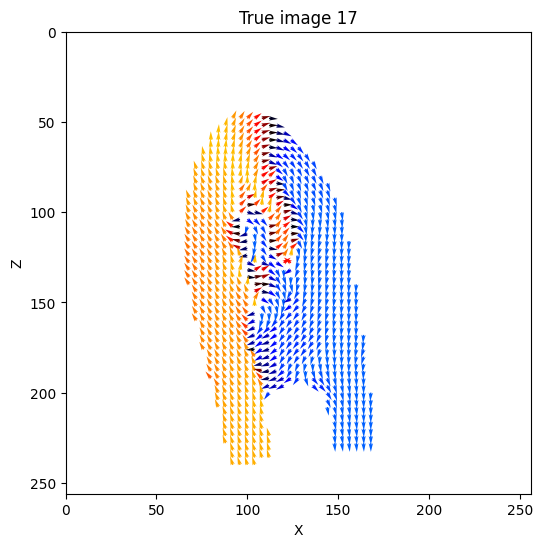

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# データの準備
test_inputs = np.load('test_inputs.npy')   # 極座標系の vr
# test_outputs = np.load('test_outputs.npy') # 極座標系の vtheta
test_gt = np.load('test_gt.npy')

# 出力フォルダ
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)

# 画像サイズ
H, W = 256, 256
i = 17  # 可視化するサンプルのインデックス

# 格子点を作成（4ピクセル間隔）
x = np.arange(0, W, 4)
y = np.arange(0, H, 4)
X, Y = np.meshgrid(x, y)

# ベクトル場のデータ
vx = test_inputs[i, 0]  # Radial velocity (vr)
# vy = -test_outputs[i, 0]  # Tangential velocity (vtheta)
vy = -test_gt[i, 0]

# 4ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]  # Radial component
V_theta = vy[::4, ::4]  # Tangential component

# **速度の閾値を設定し、|V_dop| >= 0.5 のベクトルのみ描画**
valid_mask = np.abs(V_dop) >= 0.001

# **有効なデータのみ取得**
X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
U_valid = V_theta[valid_mask]
V_valid = V_dop[valid_mask]

# **ベクトルを正規化して大きさを統一**
magnitude = np.sqrt(U_valid**2 + V_valid**2)
U_valid /= magnitude
V_valid /= magnitude

# **V_dop の最大絶対値を取得（カラーマップを対称にする）**
max_V = np.abs(V_dop).max()

# **カスタムカラーマップの作成**
cmap_colors = [
    (1, 1, 0),  # Yellow (負の大きい速度)
    (1, 0, 0),  # Red (負の中間)
    (0, 0, 0),  # Black (ゼロ)
    (0, 0, 1),  # Blue (正の中間)
    (0, 0.5, 1)  # Light Blue (正の大きい速度)
]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

# **カラーマップの範囲を [-max_V, max_V] に設定**
norm = mcolors.Normalize(vmin=-max_V, vmax=max_V)

# **描画**
plt.figure(figsize=(6, 6))
plt.xlim(0, W)
plt.ylim(H, 0)

# **ベクトルの大きさを統一し、矢印の太さを調整**
plt.quiver(X_valid, Y_valid, U_valid, V_valid, V_valid, 
           angles="xy", scale_units="xy", scale=None, 
           cmap=cmap_custom, norm=norm, width=0.005, headlength=6, headaxislength=5)

# **タイトル**
plt.title(f"True image {i}")
plt.xlabel("X")
plt.ylabel("Z")

# **表示**
plt.show()

# **画像保存**
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}_filtered_colored_vdopgt.png"))
plt.close()


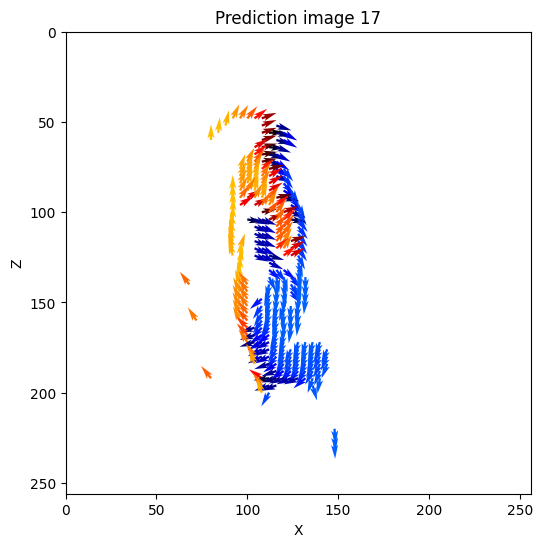

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# データの準備
test_inputs = np.load('test_inputs.npy')   # 極座標系の vr
test_outputs = np.load('test_outputs.npy') # 極座標系の vtheta

# 出力フォルダ
output_folder = "vector_field_output"
os.makedirs(output_folder, exist_ok=True)

# 画像サイズ
H, W = 256, 256
i = 17  # 可視化するサンプルのインデックス

# 格子点を作成（4ピクセル間隔）
x = np.arange(0, W, 4)
y = np.arange(0, H, 4)
X, Y = np.meshgrid(x, y)

# ベクトル場のデータ
vx = test_inputs[i, 0]  # Radial velocity (vr)
vy = -test_outputs[i, 0]  # Tangential velocity (vtheta)

# 4ピクセルごとにダウンサンプリング
V_dop = vx[::4, ::4]  # Radial component
V_theta = vy[::4, ::4]  # Tangential component

# **速度の閾値を設定し、|V_dop| >= 0.5 のベクトルのみ描画**
valid_mask =( np.abs(V_dop)>=0.02) & (np.abs(V_dop) <= 0.3)

# **有効なデータのみ取得**
X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
U_valid = V_theta[valid_mask]
V_valid = V_dop[valid_mask]

# **ベクトルを正規化して大きさを統一**
magnitude = np.sqrt(U_valid**2 + V_valid**2)
U_valid /= magnitude
V_valid /= magnitude

# **V_dop の最大絶対値を取得（カラーマップを対称にする）**
max_V = np.abs(V_dop).max()

# **カスタムカラーマップの作成**
cmap_colors = [
    (1, 1, 0),  # Yellow (負の大きい速度)
    (1, 0, 0),  # Red (負の中間)
    (0, 0, 0),  # Black (ゼロ)
    (0, 0, 1),  # Blue (正の中間)
    (0, 0.5, 1)  # Light Blue (正の大きい速度)
]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

# **カラーマップの範囲を [-max_V, max_V] に設定**
norm = mcolors.Normalize(vmin=-max_V, vmax=max_V)

# **描画**
plt.figure(figsize=(6, 6))
plt.xlim(0, W)
plt.ylim(H, 0)

# **ベクトルの大きさを統一し、矢印の太さを調整**
plt.quiver(X_valid, Y_valid, U_valid, V_valid, V_valid, 
           angles="xy", scale_units="xy", scale=None, 
           cmap=cmap_custom, norm=norm, width=0.005, headlength=6, headaxislength=5)

# **タイトル**
plt.title(f"Prediction image {i}")
plt.xlabel("X")
plt.ylabel("Z")

# **表示**
plt.show()

# **画像保存**
plt.savefig(os.path.join(output_folder, f"vector_field_{i+1}_filtered2_colored_vdop.png"))
plt.close()